## explore

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy as sp 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Exploring
import scipy.stats as stats

In [3]:
from acquire import *
from prepare import *

df = prep_iris_data(get_iris_data())

In [4]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 6)

In [6]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    
summarize_df(df)


Rows & Columns:

(150, 6)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 6 columns):
species           150 non-null object
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_encode    150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
None

First 5 rows:

  species  sepal_length  sepal_width  petal_length  petal_width  \
0  setosa           5.1          3.5           1.4          0.2   
1  setosa           4.9          3.0           1.4          0.2   
2  setosa           4.7          3.2           1.3          0.2   
3  setosa           4.6          3.1           1.5          0.2   
4  setosa           5.0          3.6           1.4          0.2   

   species_encode  
0               0  
1               0  
2               0  
3               0  
4               0  

Last 5 rows:

       

##### Measurements are in cm.

Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, test_size = 0.3, random_state = 123)

In [9]:
train.shape

(105, 6)

In [10]:
test.shape

(45, 6)

In [11]:
45/150

0.3

In [12]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    
summarize_df(train)


Rows & Columns:

(105, 6)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 114 to 109
Data columns (total 6 columns):
species           105 non-null object
sepal_length      105 non-null float64
sepal_width       105 non-null float64
petal_length      105 non-null float64
petal_width       105 non-null float64
species_encode    105 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.7+ KB
None

First 5 rows:

        species  sepal_length  sepal_width  petal_length  petal_width  \
114   virginica           5.8          2.8           5.1          2.4   
136   virginica           6.3          3.4           5.6          2.4   
53   versicolor           5.5          2.3           4.0          1.3   
19       setosa           5.1          3.8           1.5          0.3   
38       setosa           4.4          3.0           1.3          0.2   

     species_encode  
114               2  
136               2  
53                1  
19              

In [97]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    
summarize_df(test)


Rows & Columns:

(45, 6)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 72 to 142
Data columns (total 6 columns):
species           45 non-null object
sepal_length      45 non-null float64
sepal_width       45 non-null float64
petal_length      45 non-null float64
petal_width       45 non-null float64
species_encode    45 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB
None

First 5 rows:

        species  sepal_length  sepal_width  petal_length  petal_width  \
72   versicolor           6.3          2.5           4.9          1.5   
112   virginica           6.8          3.0           5.5          2.1   
132   virginica           6.4          2.8           5.6          2.2   
88   versicolor           5.6          3.0           4.1          1.3   
37       setosa           4.9          3.6           1.4          0.1   

     species_encode  
72                1  
112               2  
132               2  
88                1  
37 

1. Data has been split into two sets, train and test and each set has roughly the same descriptive statistics, as one another and as the unsplit df as a whole.

2. Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

In [103]:
# melt dataset into 'long form' format:
df_melt = pd.melt(train[['sepal_length','sepal_width', 'petal_length','petal_width','species', 'species_encode']],
                  'species', var_name='attributes')

In [104]:
df_melt.head()

,species,attributes,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


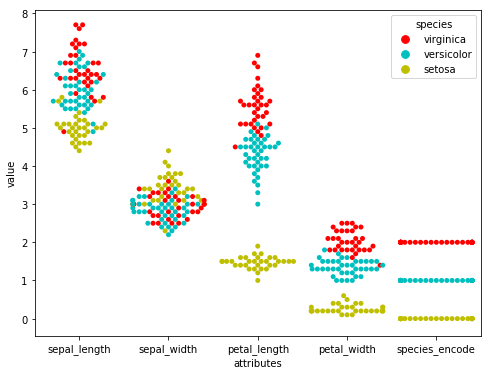

In [110]:
# set plot size:
plt.figure(figsize=(8,6))

# draw scatterplot to show each respresentation:
sns.swarmplot(x='attributes', y='value', hue='species', data=df_melt, palette=["r", "c", "y"])

This visualization tells me that the sepal widths are very close for all three species, while petal length and width are more varied. It further tells me that species 1 and 2 appear to be more similar to one another than does species 0.

#### Create 4 subplots (2 rows x 2 columns) of scatterplots
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8.
- What are your takeaways?

Text(0.5, 1.0, 'Sepal l vs petal l')

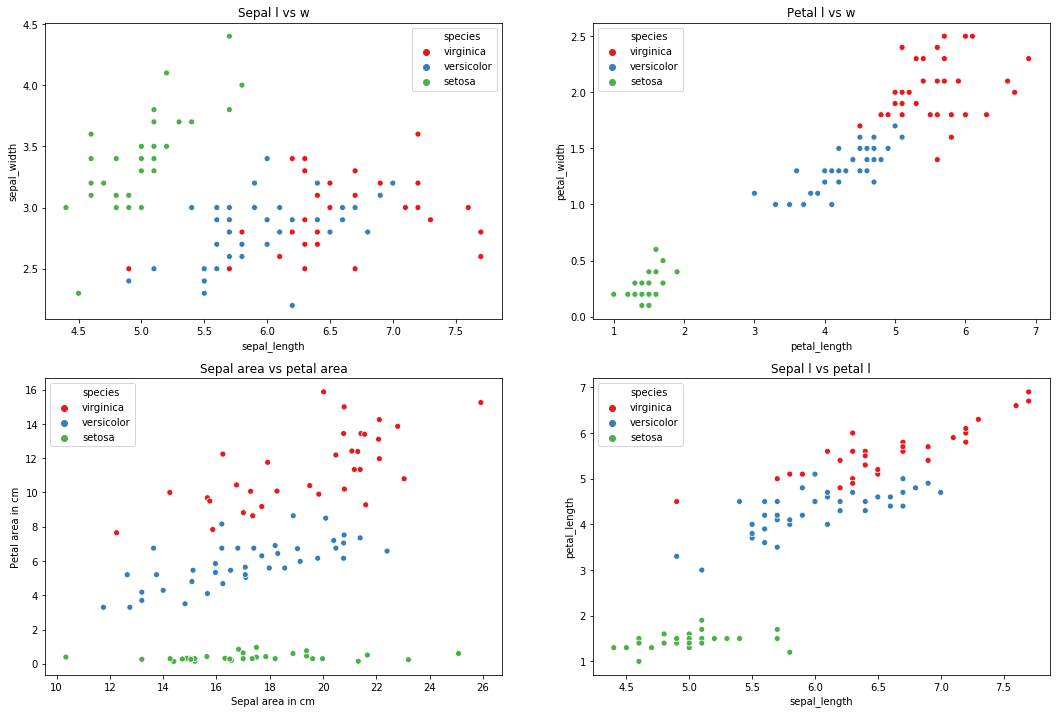

In [108]:
plt.figure(figsize=(18,12))

plt.subplot(221)
x = train.sepal_length
y = train.sepal_width
sns.scatterplot(x, y, hue=train.species, palette='Set1')
plt.title('Sepal l vs w')

plt.subplot(222)
x = train.petal_length
y = train.petal_width
sns.scatterplot(x, y, hue=train.species, palette='Set1')
plt.title('Petal l vs w')

plt.subplot(223)
x = train.sepal_width * train.sepal_length
y = train.petal_width * train.petal_length
sns.scatterplot(x, y, hue=train.species, palette='Set1')
plt.title('Sepal area vs petal area')
plt.xlabel('Sepal area in cm')
plt.ylabel('Petal area in cm')

plt.subplot(224)
x = train.sepal_length
y = train.petal_length
sns.scatterplot(x, y, hue=train.species, palette='Set1')
plt.title('Sepal l vs petal l')

## add in takeaways from the above charts

Create a heatmap of each variable layering correlation coefficient on top.

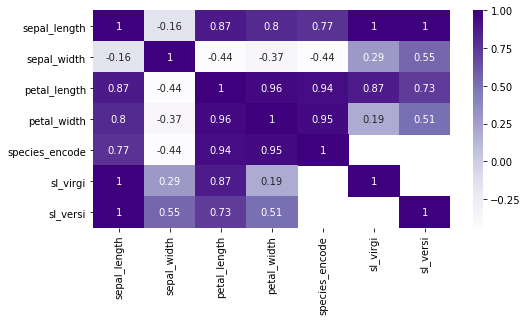

In [112]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Purples', annot=True)

<Figure size 576x288 with 0 Axes>

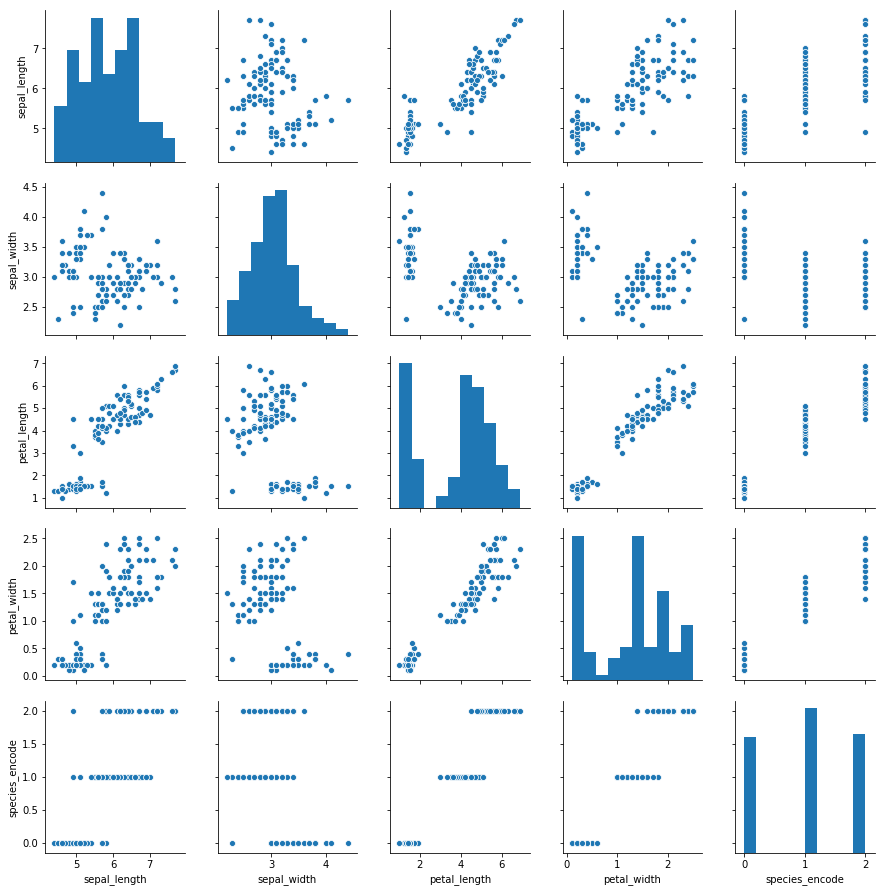

In [19]:
plt.figure(figsize=(8,4))
sns.pairplot(train)

Create a scatter matrix visualizing the interaction of each variable

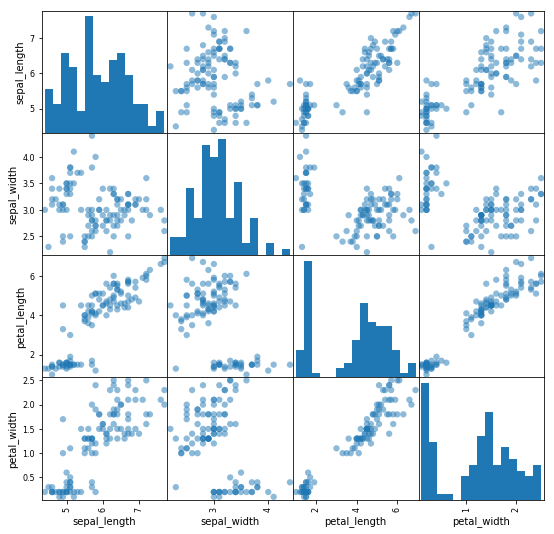

In [120]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train[['sepal_length','sepal_width', 'petal_length','petal_width']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap

#### Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.

- must include null hypothesis, alternative hyp, t-test, results, summary

- H0: the difference in sepal length between virginica and versicolor is insignificant.
    
- Ha: the difference in sepal length between virginica and versicolor is substantial.
    
- We will test if the sepal length of virginica is significantly different than that of the versicolor.

- If there is difference, then variable sepal_length is a good choice to keep as a feature.

- We can use a t-test here, as sepal_length is somwhat normally distributed.

#### Answers, responses to the above questions:
- Compare two groups: Is the sepal length of virginical irises significantly different from that of versicolor irises?

##### Null Hypothesis
- H0: The difference in sepal length between the virginica iris (subset A) and the versicolor iris (subset B) is NOT SIGNIFICANT and/or NOT SUBSTANTIAL (basically 0).

##### Alternative Hypothesis
- Ha: The difference in sepal length between the virginica iris (subset A) and the versicolor iris (subset B) IS INDEED SIGNIFICANT and/or IS SUBSTANTIAL.

##### T-test
- We will test if the observations of sepal length of virginica iris (subset A) has significantly different measures than the observations of sepal length of versicolor iris (subset B).

- If there is difference, then variable sepal length is a good choice to keep as a feature.

- We can use a t-test here, as sepal length is somwhat normally distributed.
- T-TEST

##### Summary
- summary

##### Results
- results

In [21]:
create two dataframes with virginica and sepal length, and versicolor and sepal length
then look at 

reject null hypothesis if there is the sepal lengths are significantly different

SyntaxError: invalid syntax (<ipython-input-21-3e26b4fc4980>, line 1)

In [22]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train[train.species_encode == 2].sepal_length,
    train[train.species_encode == 1].sepal_length)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [23]:
train['sl_virgi'] = train.sepal_length[train.species_encode == 2]
train['sl_versi'] = train.sepal_length[train.species_encode == 1]

In [124]:
# males = data[data['Gender']==2]
# females = data[data['Gender']==1]

train_sl_virgi = train[train['species_encode'] == 2]
train_sl_versi = train[train['species_encode'] == 1]

sp.stats.ttest_ind(train_sl_virgi['sepal_length'], train_sl_versi['sepal_length'])

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [142]:
# males = data[data['Gender']==2]
# females = data[data['Gender']==1]

train_sl_virgi = train[train['species_encode'] == 2]
train_sl_versi = train[train['species_encode'] == 1]

sp.stats.ttest_ind(train_sl_virgi['sepal_length'], train_sl_virgi['petal_length'])

Ttest_indResult(statistic=6.851103980711945, pvalue=3.3931656600075748e-09)

In [143]:
# males = data[data['Gender']==2]
# females = data[data['Gender']==1]

train_sl_virgi = train[train['species_encode'] == 2]
train_sl_versi = train[train['species_encode'] == 1]

sp.stats.ttest_ind(train_sl_versi['sepal_length'], train_sl_versi['petal_length'])

Ttest_indResult(statistic=15.740588301707053, pvalue=6.318276691820341e-26)

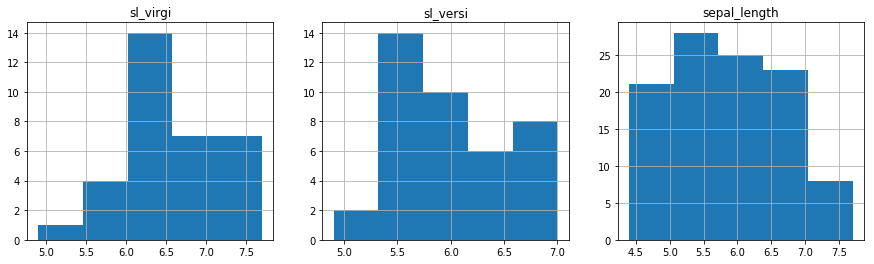

In [25]:
plt.figure(figsize=(15,4))
for i, col in enumerate([
'sl_virgi',
'sl_versi',   
'sepal_length'
]):
    plot_number = i + 1
    series = train[col]
    plt.subplot(1, 3, plot_number)
    plt.title(col)
    series.hist(bins=5, density=False, cumulative=False, log=False)
plt.show()

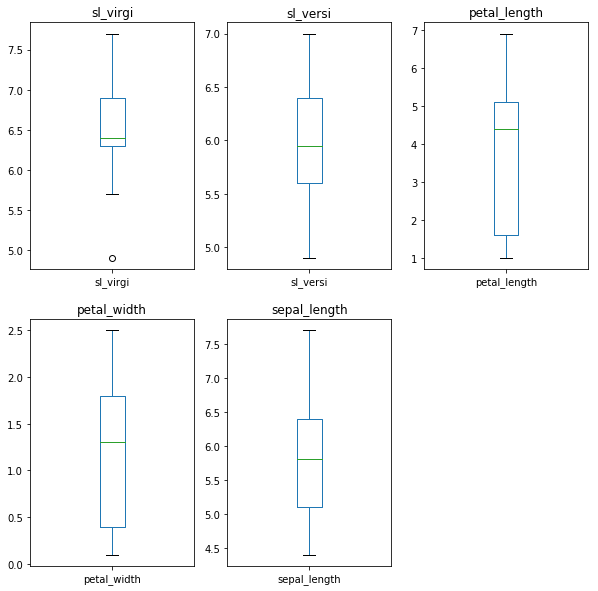

In [68]:
plt.figure(figsize=(10,10))
for i, col in enumerate(['sl_virgi',
                         'sl_versi',
                         'petal_length',
                         'petal_width',
                         'sepal_length'
                        ]):
    plot_number = i + 1
    series = train[col]
    plt.subplot(2, 3, plot_number)
    plt.title(col)
    series.plot.box() #logy=True

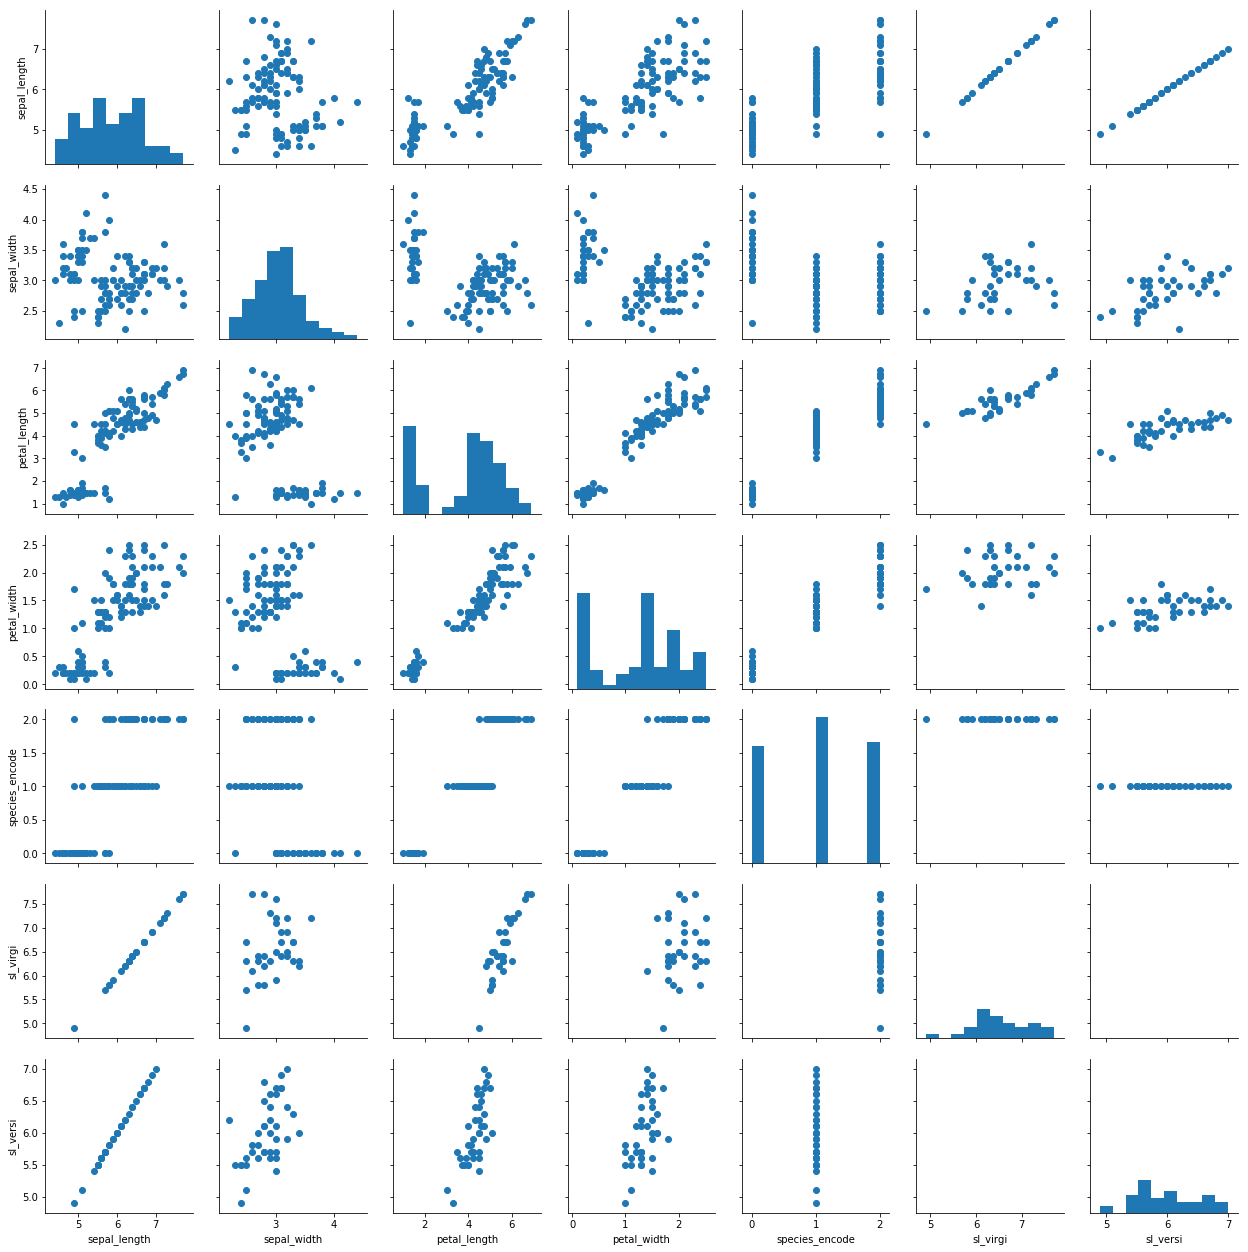

In [121]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Personal note re R^2:
Need: R^2 greater than .5;  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."

Also re Pearson's R:  "Pearson's R is __ with a significance p-value of __"


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


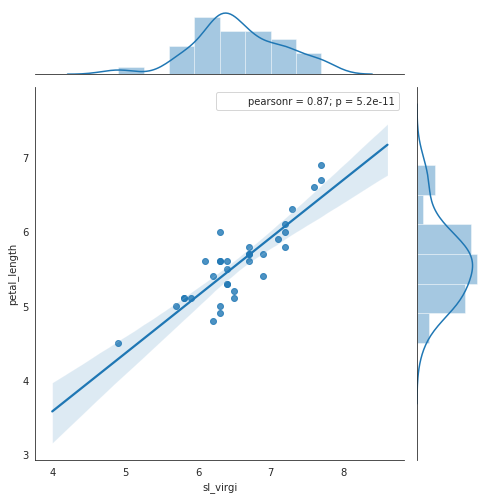

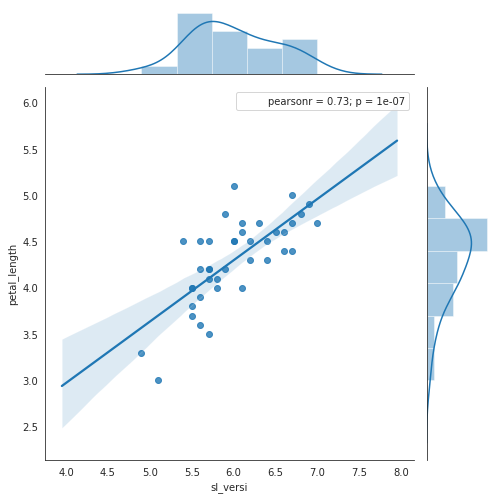

In [136]:
for i, col in enumerate([
'sl_virgi',
'sl_versi'
]):
    with sns.axes_style('white'):
            plot_number = i + 1
            series = train[col]
            j = sns.jointplot(train[col], 'petal_length', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

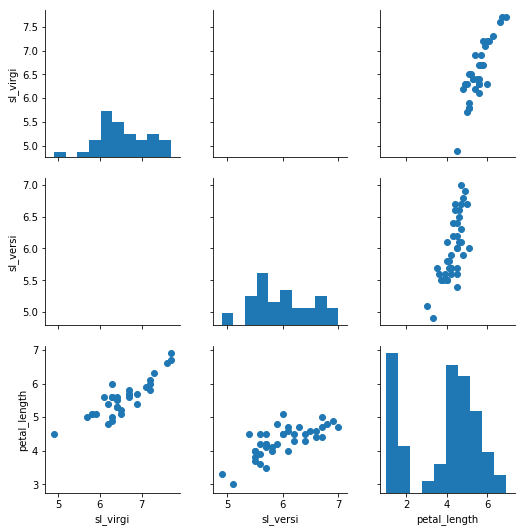

In [137]:
df_sls = train[['sl_virgi', 'sl_versi','petal_length']]

g = sns.PairGrid(df_sls)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
create two dataframes with virginica and sepal length, and versicolor and sepal length
then look at 
reject null hypothesis if there is the sepal lengths are significantly different

The differences in sepal length among the virginica and versicolor are noted in the R score, the R^2 score, and the p-values are also considerably different when comparing the two iris' sepal length against petal length.  Also, the standard deviations of the two groups are different.

Because of this, I reject the null hypothesis, and state that the sepal lengths of the two types of iris are indeed different.

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 114 to 109
Data columns (total 8 columns):
species           105 non-null object
sepal_length      105 non-null float64
sepal_width       105 non-null float64
petal_length      105 non-null float64
petal_width       105 non-null float64
species_encode    105 non-null int64
sl_virgi          33 non-null float64
sl_versi          40 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.4+ KB


In [139]:
train[['species', 'species_encode']].sample(5)

,species,species_encode
68,versicolor,1
101,virginica,2
110,virginica,2
10,setosa,0
17,setosa,0


In [38]:
a = np.array([4, 10, 12, 23, -2, -1, 0, 0, 0, -6, 3, -7])

greater_than_zero = a > 0
greater_than_zero

array([ True,  True,  True,  True, False, False, False, False, False,
       False,  True, False])

In [35]:
greater_than_zero[greater_than_zero == True].sum()

5

In [140]:
train[train.species_encode == 2].std()

sepal_length      0.613948
sepal_width       0.298893
petal_length      0.548448
petal_width       0.282642
species_encode    0.000000
sl_virgi          0.613948
sl_versi               NaN
dtype: float64

In [141]:
train[train.species_encode == 1].std()

sepal_length      0.505863
sepal_width       0.283194
petal_length      0.460483
petal_width       0.196116
species_encode    0.000000
sl_virgi               NaN
sl_versi          0.505863
dtype: float64